# Задача

Во вложении продажи одной сети с 2018 года по SKU.
В продажах есть всплески и падения, а также есть месяца с отсутствующей историей.
Нужно построить базовую линию в такой же детализации на 2021 год и ретро прогноз на 2020 год на основании данных 2018 и 2019 года, убрав всплески и падения, а также заполнив пробелы.

Для начала откроем файл и ознакомимся с представленной информацией.

In [1]:
import pandas as pd

file = pd.read_excel(r'C:\Users\bosss\Desktop\Тестовое РУСТ\Книга2.xlsx')
file

,Brand,SKU_prognoz,YEAR,1,2,3,4,5,6,7,...,10,11,12,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,"Topaz Goluboi 0,1 38*","Настойка Голубой Топаз 0,1 38 %",2019.0,3122.244444,NaN,NaN,NaN,NaN,NaN,NaN,...,3203.888889,4157.222222,4924.122222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Topaz Goluboi 0,25 38*","Настойка Голубой Топаз 0,25 38 %",2019.0,2697.555556,NaN,NaN,NaN,NaN,NaN,NaN,...,12332.638889,12762.916667,16092.361111,NaN,NaN,NaN,NaN,YEAR,NaN,NaN
2,"Topaz Goluboi 0,5 38*","Настойка Голубой Топаз 0,5 38 %",2019.0,6255.777778,NaN,NaN,NaN,NaN,NaN,NaN,...,13988.333333,16889.388889,18759.833333,NaN,NaN,SKU_prognoz,Values,2018,2019.000000,2020.000000
3,"Yamskaya 0,1","ЯМСКАЯ Мягкая Бутылка 0,1 л",2019.0,2520.677778,NaN,NaN,NaN,NaN,NaN,NaN,...,3557.922222,2847.544444,3103.222222,NaN,NaN,"Atto Primo Asti 0,75",1,495.167,2151.583333,2250.416667
4,"Yamskaya 0,25 (ЭКСКЛЮЗИВ)","ЯМСКАЯ Мягкая Бутылка 0,25 л",2019.0,36405.444444,NaN,NaN,NaN,NaN,NaN,NaN,...,11664.944444,10363.722222,12662.611111,NaN,NaN,"Atto Primo Asti 0,75",2,725.75,NaN,1443.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"ЯМСКАЯ Мягкая Бутылка 0,5 л",8,34969,1072.166667,6963.611111
455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"ЯМСКАЯ Мягкая Бутылка 0,5 л",9,39446.4,7535.000000,7380.555556
456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"ЯМСКАЯ Мягкая Бутылка 0,5 л",10,45590.4,13644.111111,7660.833333
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"ЯМСКАЯ Мягкая Бутылка 0,5 л",11,45357.1,10926.388889,7040.722222


Видим, что в файле находятся две таблицы, разделим их

In [2]:
file.columns

Index([      'Brand', 'SKU_prognoz',        'YEAR',             1,
                   2,             3,             4,             5,
                   6,             7,             8,             9,
                  10,            11,            12, 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [3]:
df1 = file.drop(['Unnamed: 15','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
                   'Unnamed: 20', 'Unnamed: 21'], axis = 1)
df2 = file.drop(['Brand', 'SKU_prognoz', 'YEAR',1,2,3,4,5,6,7,8,9,10,11,12, 'Unnamed: 15',
                   'Unnamed: 16'],axis = 1)[2:]

In [4]:
df1

,Brand,SKU_prognoz,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,"Topaz Goluboi 0,1 38*","Настойка Голубой Топаз 0,1 38 %",2019.0,3122.244444,NaN,NaN,NaN,NaN,NaN,NaN,403.600000,2970.966667,3203.888889,4157.222222,4924.122222
1,"Topaz Goluboi 0,25 38*","Настойка Голубой Топаз 0,25 38 %",2019.0,2697.555556,NaN,NaN,NaN,NaN,NaN,NaN,1421.166667,12234.500000,12332.638889,12762.916667,16092.361111
2,"Topaz Goluboi 0,5 38*","Настойка Голубой Топаз 0,5 38 %",2019.0,6255.777778,NaN,NaN,NaN,NaN,NaN,NaN,1999.277778,13738.611111,13988.333333,16889.388889,18759.833333
3,"Yamskaya 0,1","ЯМСКАЯ Мягкая Бутылка 0,1 л",2019.0,2520.677778,NaN,NaN,NaN,NaN,NaN,NaN,372.911111,2179.077778,3557.922222,2847.544444,3103.222222
4,"Yamskaya 0,25 (ЭКСКЛЮЗИВ)","ЯМСКАЯ Мягкая Бутылка 0,25 л",2019.0,36405.444444,NaN,NaN,NaN,NaN,NaN,NaN,1183.750000,6686.305556,11664.944444,10363.722222,12662.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2

,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
2,SKU_prognoz,Values,2018,2019.000000,2020.000000
3,"Atto Primo Asti 0,75",1,495.167,2151.583333,2250.416667
4,"Atto Primo Asti 0,75",2,725.75,NaN,1443.166667
5,"Atto Primo Asti 0,75",3,1491.25,NaN,2122.916667
6,"Atto Primo Asti 0,75",4,1189.92,NaN,1206.916667
...,...,...,...,...,...
454,"ЯМСКАЯ Мягкая Бутылка 0,5 л",8,34969,1072.166667,6963.611111
455,"ЯМСКАЯ Мягкая Бутылка 0,5 л",9,39446.4,7535.000000,7380.555556
456,"ЯМСКАЯ Мягкая Бутылка 0,5 л",10,45590.4,13644.111111,7660.833333
457,"ЯМСКАЯ Мягкая Бутылка 0,5 л",11,45357.1,10926.388889,7040.722222


Судя по моим наблюдениям, вторая и первая таблицы не отличаются по информативности, однако вторая представлена в формате сводной.

Приведем таблицы в нормальный вид, для удобства работы с ними

### Вторая (сводная) таблица

In [6]:
df2.columns = ['SKU_prognoz','Values','2018','2019','2020']

In [7]:
df2 = df2[1:].reset_index(drop = True)
df2

,SKU_prognoz,Values,2018,2019,2020
0,"Atto Primo Asti 0,75",1,495.167,2151.583333,2250.416667
1,"Atto Primo Asti 0,75",2,725.75,NaN,1443.166667
2,"Atto Primo Asti 0,75",3,1491.25,NaN,2122.916667
3,"Atto Primo Asti 0,75",4,1189.92,NaN,1206.916667
4,"Atto Primo Asti 0,75",5,1287.33,NaN,1699.000000
...,...,...,...,...,...
451,"ЯМСКАЯ Мягкая Бутылка 0,5 л",8,34969,1072.166667,6963.611111
452,"ЯМСКАЯ Мягкая Бутылка 0,5 л",9,39446.4,7535.000000,7380.555556
453,"ЯМСКАЯ Мягкая Бутылка 0,5 л",10,45590.4,13644.111111,7660.833333
454,"ЯМСКАЯ Мягкая Бутылка 0,5 л",11,45357.1,10926.388889,7040.722222


Оставим пока сводную таблицу и поработаем с обычной.

### Первая таблица

In [8]:
df1 = df1[:114]
df1['YEAR'] = df1['YEAR'].astype('int')

C:\Users\bosss\anaconda3\envs\praktikum\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Удалим столбец 'SKU_prognoz', т.к. он не несет в себе никакой полезной информации и идентичен столбцу 'Brand', но для начала проверим количество уникальных элементов в этих столбцах, чтобы убедиться в этом предположении.

In [9]:
display(len(df1['Brand'].unique()))
len(df1['SKU_prognoz'].unique())

38

38

Да, все совпадает, можно смело удалять.

In [10]:
df1 = df1.drop(['SKU_prognoz'], axis = 1)

Изменим немного структуру: представим каждый бренд в виде одной записи.

In [11]:
df_final = pd.merge(df1[df1['YEAR'] == 2018], df1[df1['YEAR'] == 2019], on = 'Brand')
df_final = pd.merge(df_final, df1[df1['YEAR'] == 2020], on = 'Brand')
df_final = df_final.drop(['YEAR_x', 'YEAR_y', 'YEAR'], axis = 1)
df_final.columns

Index(['Brand',   '1_x',   '2_x',   '3_x',   '4_x',   '5_x',   '6_x',   '7_x',
         '8_x',   '9_x',  '10_x',  '11_x',  '12_x',   '1_y',   '2_y',   '3_y',
         '4_y',   '5_y',   '6_y',   '7_y',   '8_y',   '9_y',  '10_y',  '11_y',
        '12_y',       1,       2,       3,       4,       5,       6,       7,
             8,       9,      10,      11,      12],
      dtype='object')

In [12]:
df_final.columns = ['Brand'] + [f'20{k+18}-{i+1}' for k in range(3) for i in range(12)]
df_final

,Brand,2018-1,2018-2,2018-3,2018-4,2018-5,2018-6,2018-7,2018-8,2018-9,...,2020-3,2020-4,2020-5,2020-6,2020-7,2020-8,2020-9,2020-10,2020-11,2020-12
0,"Topaz Goluboi 0,1 38*",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6347.233333,3207.488889,4423.866667,807.433333,86.766667,NaN,NaN,NaN,NaN,NaN
1,"Topaz Goluboi 0,25 38*",5987.611111,4928.222222,2000.416667,26.888889,2.138889,NaN,NaN,NaN,NaN,...,13981.611111,3161.750000,205.833333,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,"Topaz Goluboi 0,5 38*",9848.555556,8447.166667,8720.944444,7123.055556,5060.277778,1696.111111,1.277778,NaN,NaN,...,17881.722222,19060.055556,6761.055556,2088.166667,565.722222,NaN,NaN,NaN,NaN,NaN
3,"Yamskaya 0,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,552.377778,...,4088.533333,4933.011111,2069.155556,3843.711111,3225.855556,4062.155556,4057.555556,3279.888889,2200.600000,NaN
4,"Yamskaya 0,25 (ЭКСКЛЮЗИВ)",12398.166667,12263.416667,13843.194444,18860.111111,21661.027778,21651.333333,24360.805556,34243.333333,36327.888889,...,10604.722222,11661.472222,7532.944444,2555.555556,2008.333333,4529.361111,4558.527778,5088.527778,4992.888889,NaN
5,"Yamskaya 0,5 (ЭКСКЛЮЗИВ)",22338.333333,20157.555556,25215.611111,30271.500000,31746.777778,31327.611111,30118.388889,34969.000000,39446.444444,...,11467.111111,12465.722222,12164.722222,9226.777778,5959.555556,6963.611111,7380.555556,7660.833333,7040.722222,NaN
6,"Green Mark Cedar 0,1 flask",1761.911111,1893.888889,1620.800000,1573.211111,1559.788889,1799.377778,3354.133333,6466.688889,7634.922222,...,2237.633333,3182.711111,3105.333333,2786.466667,2642.177778,3084.488889,3270.711111,3165.333333,2596.266667,NaN
7,"Green Mark Cedar 0,25",3151.888889,2919.444444,3059.055556,3588.527778,3446.166667,4045.500000,4196.611111,5438.166667,5702.527778,...,7779.583333,5967.444444,5101.805556,5285.527778,4931.611111,5719.750000,6141.527778,7003.250000,6543.611111,NaN
8,"Green Mark Cedar 0,5",16208.166667,12274.888889,14895.555556,16206.611111,15867.611111,19765.111111,18752.111111,17912.222222,15444.944444,...,15567.333333,17918.722222,16080.500000,10670.833333,13459.166667,12906.611111,13147.000000,18118.222222,19107.166667,NaN
9,"Talka 0,25",2911.611111,2775.555556,3082.888889,3811.805556,3497.833333,3790.166667,3964.472222,5082.472222,5670.472222,...,7026.666667,5062.083333,4756.583333,4280.277778,4166.194444,4620.416667,4997.277778,6377.666667,7004.055556,NaN


Всего у нас 38 позиций.<br>
Столбцы - это наши месяцы. 

Теперь поработаем с пропусками.
Пропущеные значения могли появиться по разным причинам, как по естественным, так и по случайным, например, отсутствие алкогольных брендов на полках в магазине из-за не сделанного заказа на поставку или же вовсе результат компьютерного сбоя при сборе данных.<br>

Предлагаю заполнить пропуски нулевыми значениями, поскольку причин появления пропусков может быть много, и идентифицировать их сложно, не имея никакой дополнительной информации. Также есть вариант заполнить пропуски медианными / средними / или иными значениями, однако есть риск "загрязнить" данные, поэтому я считаю обоснованным заполнить пропущенные значения первым способом (нулевыми значениями). К тому же, судя по данным, некоторые бренды, к примеру, в 2018 и в 2019 годах имеют пропущенные значения, а затем значения появляются, в этом случае можно предположить, что в 2018 и 2019 годах товар не продавался. Поэтому значения вышеназванных лет разумно заполнить нулями, что еще раз подтверждает правильность моего подхода.

In [13]:
df_final = df_final.fillna(0)

Пропуски обработаны.

А теперь уберем всплески и падения наших временных рядов. Для решения этой задачи есть 2 варианта: ресемплирование с агрегирующей функцией или скользящее среднее. Эти подходы помогут снизить колебания в наших данных и сгладить временные ряды.

Мы пойдем путем скользящего среднего. Для этого транспонируем таблицу (строки станут столбцами, а столбцы строками), примем за размер скользящего окна - 5 (чем больше, тем сильнее сглаживание) и в качестве табличного индекса укажем дату.

In [14]:
df_final_sub = df_final.T[1:].rolling(5).mean()
df_final_sub.index = pd.to_datetime(df_final_sub.index)
df_final_sub

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01,0.000000e+00,2589.055556,7840.000000,0.000000e+00,15805.183333,25945.955556,1.681920e+03,3.233017e+03,15090.566667,3215.938889,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00
2018-06-01,0.000000e+00,1391.533333,6209.511111,0.000000e+00,17655.816667,27743.811111,1.689413e+03,3.411739e+03,15801.955556,3391.650000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00
2018-07-01,0.000000e+00,405.888889,4520.333333,0.000000e+00,20075.294444,29735.977778,1.981462e+03,3.667172e+03,17097.400000,3629.433333,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00
2018-08-01,0.000000e+00,5.805556,2776.144444,0.000000e+00,24155.322222,31686.655556,2.950640e+03,4.142994e+03,17700.733333,4029.350000,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00
2018-09-01,0.000000e+00,0.427778,1351.533333,1.104756e+02,27648.877778,33521.644444,4.162982e+03,4.565794e+03,17548.400000,4401.083333,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00
2018-10-01,0.000000e+00,804.222222,1837.922222,4.805222e+02,30359.122222,36290.366667,5.736880e+03,5.121772e+03,17884.688889,4914.394444,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00


Здорово, таблица есть. Узнаем, смогли ли мы избежать сильных колебаний. Для этого возьмем случайным образом 5 брендов и разберем их распределение.

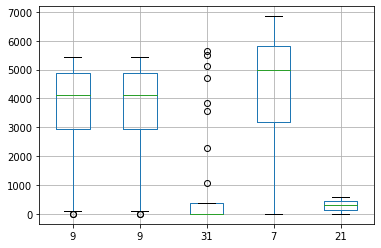

In [15]:
import random

x = [random.randint(1, df_final_sub.shape[1]-1) for _ in range(5)]
boxplot = df_final_sub.boxplot(column=x)

Видим высокие значения продаж для некоторых брендов, причиной этого является восходящий тренд.<br>
Посмотрим на разбику рядов по тренду и сезонности этих брендов.

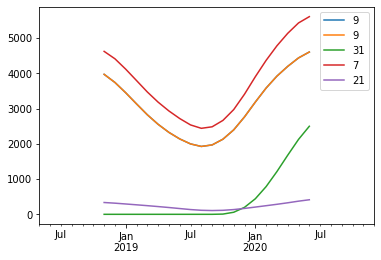

In [16]:
# Тренд
from statsmodels.tsa.seasonal import seasonal_decompose

for i in x:
    decomposed = seasonal_decompose(df_final_sub[4:][i])
    a=decomposed.trend 
    a.plot(legend = f'{i}')

Делаем вывод, что для брендов, сумма продаж которых выходит за пределы 1го квантиля, наблюдается восходяший тренд.<br>
Следовательно, ситуацию с яркими всплесками и падениями мы урегулировали.

Рассмотрим фактор сезонности (есть шанс почерпнуть полезный вывод) и перейдем к построению базовой линии.

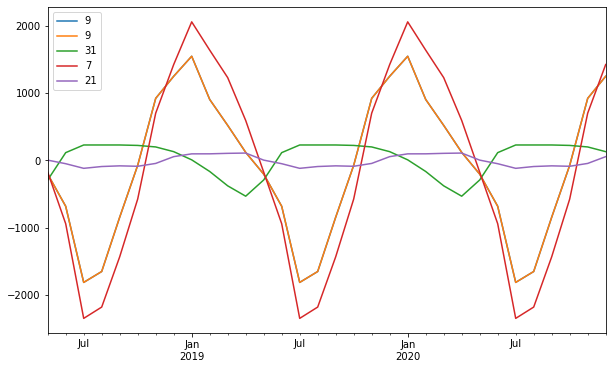

In [17]:
# Сезонность
for i in x:
    decomposed = seasonal_decompose(df_final_sub[4:][i])
    a=decomposed.seasonal 
    a.plot(figsize=(10, 6), legend = f'{i}')

Видим, что для некоторых брендов пиковой точкой является январь месяц, начиная с июля наблюдается стремительный рост.

Но есть и другие бренды со своими пиками в летние периоды, узнаем, с чем это связано.

In [18]:
for i in x:
    print(f'{i}: ', df_final['Brand'].iloc[i])

9:  Talka 0,25
9:  Talka 0,25
31:  Браво Джин-Тоник ж/б 0,45
7:  Green Mark Cedar 0,25
21:  Liqueur Cointreau 0,7


Видим, что бренды с превалирующим количеством продаж в зимний месяц - тяжелые алкогольные напитки, а в летний - слабоалкогольные, такие как "Сани Бриз Манго,ананас,личи 0,33" / "Аморе Пина Колада ж/б 0,45" / "Аморе Мохито ж/б 0,45" и другие. Наша выборка из 5 позиций - довольно маленькая, чтобы делать такой серьезный вывод. Эта гипотеза нуждается в дополнительной проверке.

Перейдем к построению уравнения прямой.

### Базовая линия на 2021 год

Транспонируем таблицу, к которой применили метод скользящего среднего, обратно в таблицу, где каждый бренд - это одна запись. Удалим первые четыре месяца 2018 года, т.к. все значения в них принимают значения 'Nan' (из-за скользящего окна размером 5). Потеря этих четырех месяцев не будет значимой, поскольку для построения линии тренда вполне хватит оставшихся 36-4=32ух месяцев.

In [19]:
df_sub_final = df_final_sub.T
df_sub_final.columns = ['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01']
df_sub_final = df_sub_final.drop(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01'], axis = 1)

Т.к. для построения линии тренда используется линейная модель вида y = a*x+b, рассчитаем коэффициенты тренда a и b по следующим формулам:

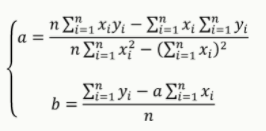

Где x - номер измерения, y - измеренные значения, n - количество измерений.

In [20]:
import numpy as np

n = 32
x = [i for i in range(5,37,1)]

n_sum_x_y  = n * np.sum(df_sub_final.multiply(x, axis='columns').T)
sum_x = np.sum(x)
sum_y = pd.Series(np.sum(df_sub_final.iloc[i]) for i in range(len(df_sub_final)))
n_sum_x_sq = n * np.sum(np.power(x, 2))
sum_sq_x = sum_x**2

# Наши коэффициенты для каждой прямой
a = (n_sum_x_y - sum_x*sum_y)/(n_sum_x_sq-sum_sq_x)
b = (sum_y - a * sum_x) / n

Коэффициенты для построения базовой линии найдены. <br>
Теперь создадим датафрейм, в котором на основании найденных коэффициентов подсчитаем прогнозные значения на 2021 год.
Отрицательные значения заменим на 0, что означает отсутсвие продаж по данной позиции.

In [21]:
df_2021 = pd.DataFrame()
for i in range(37, 25+24, 1):
    df_2021[f'{i}'] = pd.Series(i, index=df_sub_final.index) * a + b
    
df_2021[df_2021 < 0] = 0
df_0 = pd.DataFrame(df_final['Brand'])
df_2021 = df_0.merge(df_2021, right_index = True, left_index = True)
df_2021.columns = ['Brand'] +[f'2021-{i+1}' for i in range(12)]
df_2021

,Brand,2021-1,2021-2,2021-3,2021-4,2021-5,2021-6,2021-7,2021-8,2021-9,2021-10,2021-11,2021-12
0,"Topaz Goluboi 0,1 38*",2771.129010,2847.953790,2924.778570,3001.603350,3078.428130,3155.252910,3232.077690,3308.902470,3385.727250,3462.552030,3539.376810,3616.201591
1,"Topaz Goluboi 0,25 38*",5128.981060,5227.735194,5326.489328,5425.243462,5523.997596,5622.751730,5721.505864,5820.259998,5919.014132,6017.768266,6116.522400,6215.276534
2,"Topaz Goluboi 0,5 38*",8374.586402,8511.292754,8647.999106,8784.705458,8921.411810,9058.118161,9194.824513,9331.530865,9468.237217,9604.943569,9741.649921,9878.356272
3,"Yamskaya 0,1",3783.156134,3901.095550,4019.034966,4136.974383,4254.913799,4372.853215,4490.792632,4608.732048,4726.671464,4844.610881,4962.550297,5080.489713
4,"Yamskaya 0,25 (ЭКСКЛЮЗИВ)",318.211783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Yamskaya 0,5 (ЭКСКЛЮЗИВ)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Green Mark Cedar 0,1 flask",2358.244825,2317.262113,2276.279400,2235.296687,2194.313975,2153.331262,2112.348550,2071.365837,2030.383124,1989.400412,1948.417699,1907.434987
7,"Green Mark Cedar 0,25",5179.461694,5236.919441,5294.377189,5351.834937,5409.292685,5466.750433,5524.208181,5581.665928,5639.123676,5696.581424,5754.039172,5811.496920
8,"Green Mark Cedar 0,5",11373.926232,11270.906189,11167.886146,11064.866103,10961.846059,10858.826016,10755.805973,10652.785930,10549.765887,10446.745844,10343.725800,10240.705757
9,"Talka 0,25",4184.803360,4221.425881,4258.048401,4294.670922,4331.293442,4367.915963,4404.538484,4441.161004,4477.783525,4514.406045,4551.028566,4587.651086


Ниже вы можете нарисовать линию тренда на 2021 год для любого бренда.

Для получения графика линии тренда введите число от 0 до 37 в соответствии с индексом названия бренда (из таблицы выше): 10


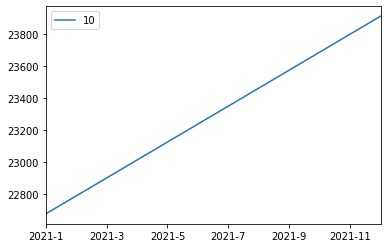

In [22]:
n = int(input('Для получения графика линии тренда введите число от 0 до 37 в соответствии с индексом названия бренда (из таблицы выше): '))
df_2021.iloc[n][1:].plot(legend = True)

### Ретро-прогноз на 2020 год

На основании данных за 2018 и 2019 года сделам ретро-прогноз на 2020

In [23]:
df_2020 = pd.DataFrame()
for i in range(25, 25+12, 1):
    df_2020[f'{i}'] = pd.Series(i, index=df_sub_final.index) * a + b
    
df_2020[df_2020 < 0] = 0
df_0 = pd.DataFrame(df_final['Brand'])
df_2020 = df_0.merge(df_2020, right_index = True, left_index = True)
df_2020.columns = ['Brand'] +[f'2020-{i+1}' for i in range(12)]
df_2020

,Brand,2020-1,2020-2,2020-3,2020-4,2020-5,2020-6,2020-7,2020-8,2020-9,2020-10,2020-11,2020-12
0,"Topaz Goluboi 0,1 38*",1849.231649,1926.056429,2002.881209,2079.705989,2156.530769,2233.355549,2310.180330,2387.005110,2463.829890,2540.654670,2617.479450,2694.304230
1,"Topaz Goluboi 0,25 38*",3943.931451,4042.685585,4141.439719,4240.193853,4338.947987,4437.702121,4536.456255,4635.210389,4733.964523,4832.718657,4931.472791,5030.226926
2,"Topaz Goluboi 0,5 38*",6734.110180,6870.816532,7007.522884,7144.229236,7280.935588,7417.641940,7554.348291,7691.054643,7827.760995,7964.467347,8101.173699,8237.880051
3,"Yamskaya 0,1",2367.883137,2485.822554,2603.761970,2721.701386,2839.640803,2957.580219,3075.519635,3193.459052,3311.398468,3429.337884,3547.277301,3665.216717
4,"Yamskaya 0,25 (ЭКСКЛЮЗИВ)",9679.938188,8899.794321,8119.650454,7339.506587,6559.362720,5779.218853,4999.074986,4218.931119,3438.787252,2658.643384,1878.499517,1098.355650
5,"Yamskaya 0,5 (ЭКСКЛЮЗИВ)",11976.361009,10949.342159,9922.323310,8895.304460,7868.285610,6841.266760,5814.247911,4787.229061,3760.210211,2733.191361,1706.172511,679.153662
6,"Green Mark Cedar 0,1 flask",2850.037377,2809.054664,2768.071951,2727.089239,2686.106526,2645.123814,2604.141101,2563.158388,2522.175676,2481.192963,2440.210250,2399.227538
7,"Green Mark Cedar 0,25",4489.968719,4547.426467,4604.884215,4662.341963,4719.799711,4777.257459,4834.715207,4892.172954,4949.630702,5007.088450,5064.546198,5122.003946
8,"Green Mark Cedar 0,5",12610.166750,12507.146707,12404.126664,12301.106621,12198.086577,12095.066534,11992.046491,11889.026448,11786.006405,11682.986362,11579.966318,11476.946275
9,"Talka 0,25",3745.333113,3781.955634,3818.578155,3855.200675,3891.823196,3928.445716,3965.068237,4001.690757,4038.313278,4074.935799,4111.558319,4148.180840


Получив значения ретро-прогноза на 2020 год, можно найти точность прогноза через среднюю относительную ошибку, опираясь на изначальные данные.

In [24]:
otosh = np.abs(df_2020.iloc[:,1:] - df_final.iloc[:,25:37]) / df_final.iloc[:,25:37]
otosh = otosh.replace(np.inf, 0)
total = np.sum(np.sum(otosh)) / otosh.shape[0] / otosh.shape[1]
print('Итоговая точность прогноза: {:.2%}'.format(total))

Итоговая точность прогноза: 40.21%


Итоговая точность является удовлетворительной, т.к. лежит в диапазоне 20-50%.

Вероятнее всего, такая низкая точность является следствием неправильно установленного типа кривой (мы выбрали линию тренда для осуществления прогноза). Как вариант, для повышения качества прогноза, можно рассмотреть тип аналитической зависимости от времени по показательной или степенной функции.

### Итог

Задача выполнена:
- всплески и падения обработаны;
- пропуски заполнены;
- базовая линия на 2021 год построена;
- ретро-прогноз на 2020 сделан.

Все итоговые значения вы можете найти выше, таблицы "df_2020" и "df_2021".